Initial Dataset Preview:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_

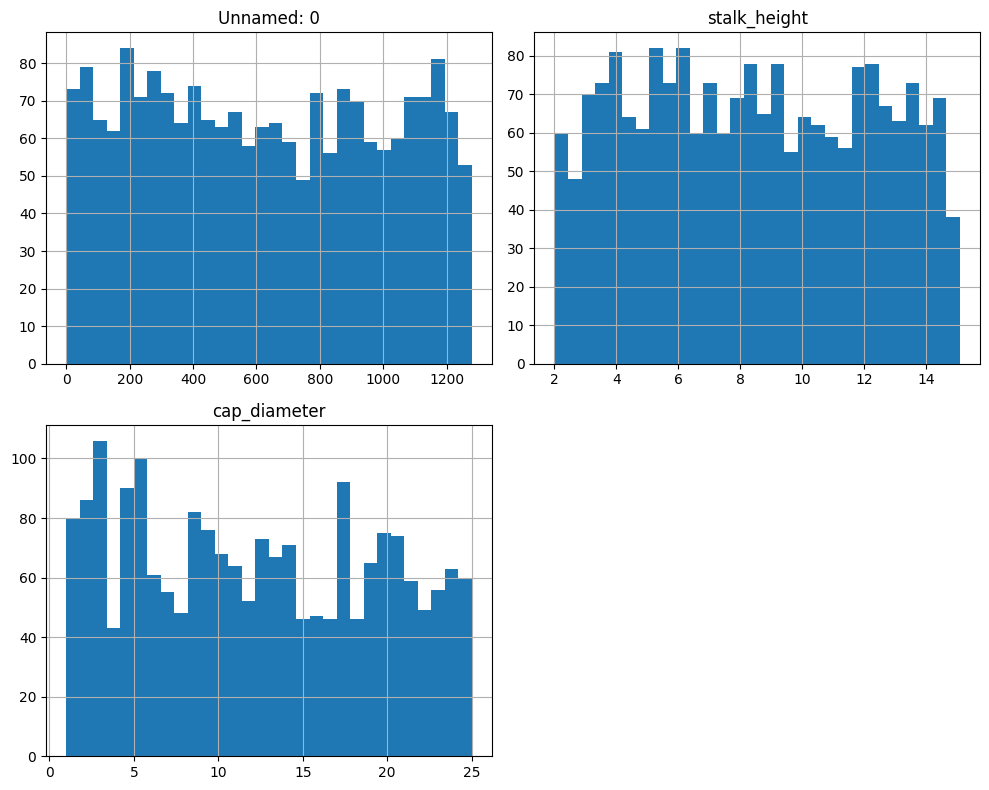

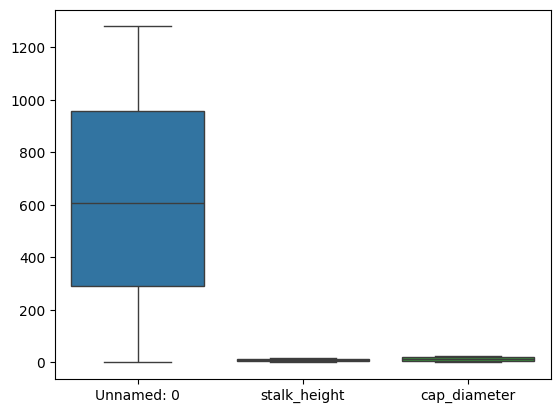

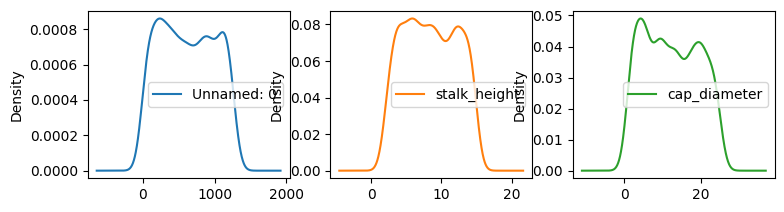

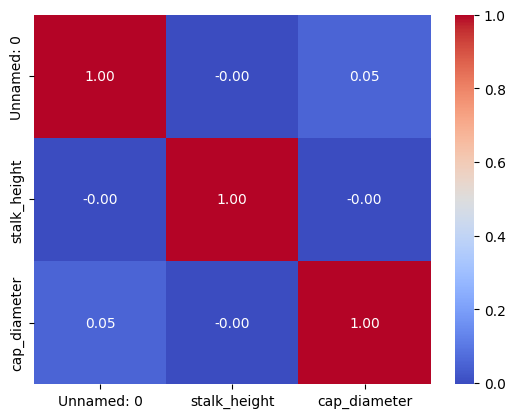


Encoded Dataset Columns:
Index(['Unnamed: 0', 'stalk_height', 'cap_diameter', 'cap_shape_conical',
       'cap_shape_convex', 'cap_shape_flat', 'cap_shape_sunken',
       'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_leaves', 'habitat_meadows', 'habitat_paths', 'habitat_urban',
       'habitat_waste', 'habitat_woods', 'class_poisonous'],
      dtype='object', length=106)


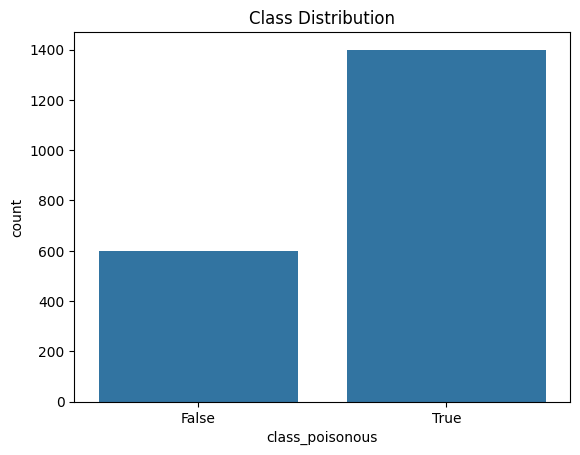


SVM Linear Kernel Performance:
Accuracy: 0.675

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

       False       0.55      0.12      0.20       133
        True       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400



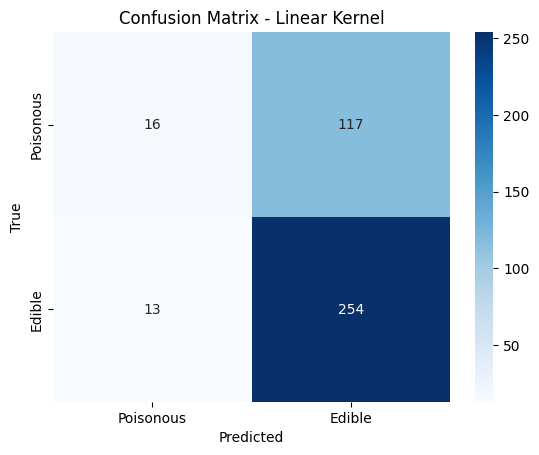


SVM Polynomial Kernel Performance:
Accuracy: 0.6675

Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


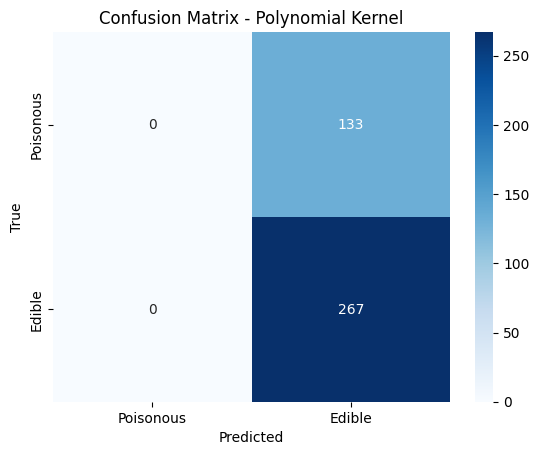


SVM RBF Kernel Performance:
Accuracy: 0.6675

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


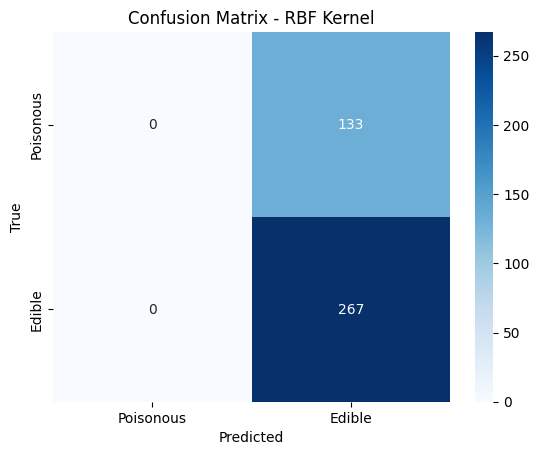


Performance Comparison:
       Kernel  Accuracy
0      Linear    0.6750
1  Polynomial    0.6675
2         RBF    0.6675


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/mushroom.csv')

print("Initial Dataset Preview:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

sns.boxplot(data=df)
plt.show()

df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

df_encoded = pd.get_dummies(df, drop_first=True)

print("\nEncoded Dataset Columns:")
print(df_encoded.columns)

if 'class_poisonous' in df_encoded.columns:
    target_column = 'class_poisonous'
else:
    target_column = 'class_edible'  # Adjust according to your actual dataset

X = df_encoded.drop(target_column, axis=1)  # Features
y = df_encoded[target_column]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("\nSVM Linear Kernel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("\nSVM Polynomial Kernel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix - Polynomial Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nSVM RBF Kernel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nPerformance Comparison:")
kernels = ['Linear', 'Polynomial', 'RBF']
accuracies = [
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_poly),
    accuracy_score(y_test, y_pred_rbf)
]

comparison_df = pd.DataFrame({
    'Kernel': kernels,
    'Accuracy': accuracies
})

print(comparison_df)